# Titnic Survival Prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Table of Contents
- [Introduction](#Introduction)
- [Data Gathering](#Data_Gathering)
- [Data Quality](#Data_Quality)
- [Data Cleaning](#Data_Cleaning)
- [Exploratory Data Analysis](#Exploratory_Data_Analysis)
- [Data Preprocessing Train](#Data_Preprocessing_Train_Dataset)
- [Data Preprocessing Test](#Data_Preprocessing_Test_Dataset)
- [Model Training](#Model_Training)
- [Model Evaluation](#Model_Evaluation)
- [Submission](#Submission)

## Introduction

The **Titanic dataset** is one of the most famous datasets in data science and machine learning.  
It is based on the real passengers of the RMS Titanic, which tragically sank on April 15, 1912.  
The dataset challenges us to build a model that can predict whether a passenger survived or not based on features such as:

- **Pclass** – Passenger class (1st, 2nd, 3rd)
- **Sex** – Gender of the passenger
- **Age** – Age of the passenger
- **SibSp** – Number of siblings/spouses aboard
- **Parch** – Number of parents/children aboard
- **Fare** – Ticket price paid
- **Embarked** – Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Goal of the Project
The goal is to build a machine learning model that predicts the `Survived` column for each passenger in the **test dataset** and generate a submission file for Kaggle.  
This is a classic **binary classification problem**, where:
- `0` = Passenger did not survive
- `1` = Passenger survived

## Data_Gathering

In [2]:
train_df = pd.read_csv(r"C:\Users\Dell\Downloads\titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\Dell\Downloads\titanic\test.csv")

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"The Data Contains: {train_df.shape} Rows & Columns")

The Data Contains: (891, 12) Rows & Columns


In [6]:
print(f"The Data Columns: {train_df.columns}")

The Data Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
print("The Data Information:")
train_df.info()

The Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print("The Data Basic Statisical Report:")
train_df.describe().round(2)

The Data Basic Statisical Report:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


This table shows summary statistics for the main numerical features in the Titanic dataset:

- **PassengerId**: Runs from 1 to 891, confirming there are 891 passengers in the training set.
- **Survived**: Mean is `0.38`, meaning about **38% of passengers survived**.
- **Pclass**: Mean is `2.31`, suggesting most passengers were in 3rd class.  
- **Age**:  
  - Average age is about **29.7 years**, with a wide spread (std = 14.5).
  - Youngest passenger is less than 1 year old, oldest is 80.
  - About **20% of ages are missing** (count is 714 vs 891 total).
- **SibSp** (siblings/spouses aboard): Mostly `0`, but some passengers have up to `8`.
- **Parch** (parents/children aboard): Mostly `0`, but some have up to `6`.
- **Fare**:  
  - Median fare is `14.45`, but max fare is `512.33`, showing **significant outliers**.
  - This justifies using a scaler that is robust to outliers (e.g., RobustScaler).

## Data_Quality

In [9]:
print("\n1.The Missing Values:")
missing_values = train_df.isna().sum()
print(missing_values)

if (missing_values == 0).all():
    print("No Missing Values Found")
else:
    print("There is Missing Data")


1.The Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
There is Missing Data



1.The Graphical Visual of Missing Values:


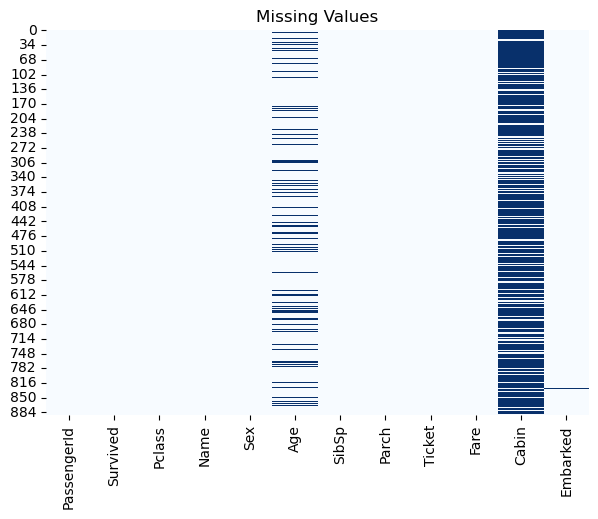

In [10]:
print("\n1.The Graphical Visual of Missing Values:")
plt.figure(figsize=(7,5))
sns.heatmap(train_df.isna(), cmap = "Blues", cbar = False)
plt.title("Missing Values")
plt.show()

In [11]:
print("\n2.The Duplication:")
duplication_values = train_df.duplicated().sum()
print(f"Total duplicate Rows: {duplication_values}")

if duplication_values == 0 :
    print("No Duplication Found")
else:
    print("There are Duplication")


2.The Duplication:
Total duplicate Rows: 0
No Duplication Found



3.The Outliers:


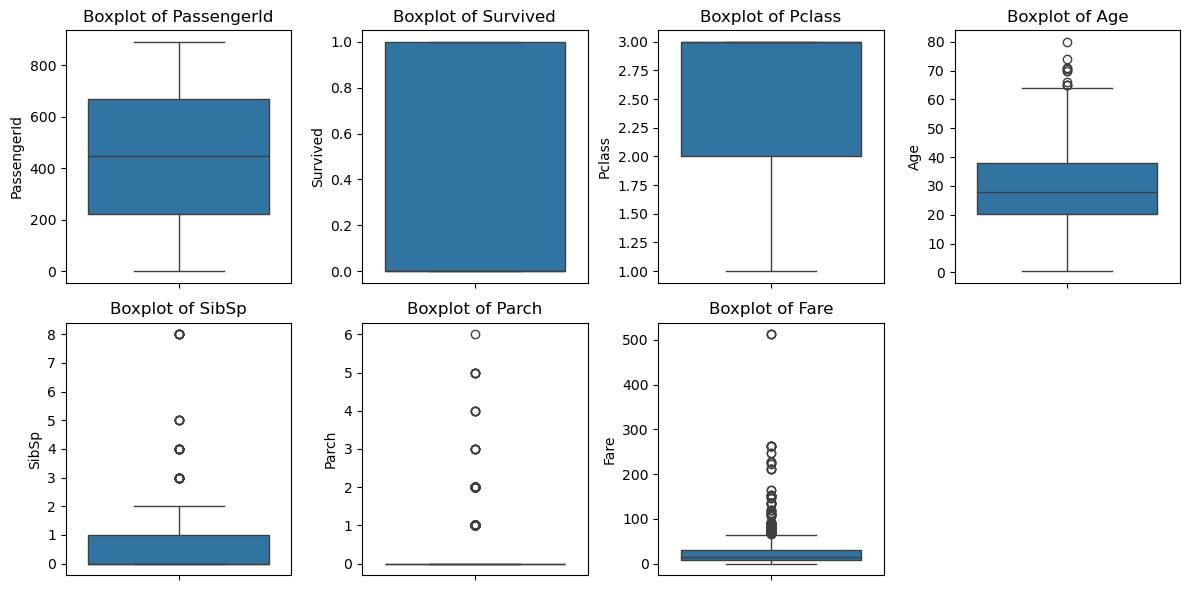

In [12]:
print("\n3.The Outliers:")
numerical_columns = train_df.select_dtypes(include=["int64","float64"]).columns

plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_columns,1):
    plt.subplot(2, (len(numerical_columns)+1)//2, i)
    sns.boxplot(data = train_df, y = col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

#### **Summary Insights**
* **Data Insights:**
    * Shape of data is 891 Rows & 12 Columns.
    * Numerical Columns: `PassengerId`, `Survived`, `Pclass`, `Age`, `Sibsp`, `Parch`, `Fare`.
    * Categorical Columns: `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`.
* **Nulls:**
    * `Age` has 177 Missing Values.
    * `Cabin` has 687 Missing Values.
    * `Embarked` has 2 Missing Values.
* **Duplication:**
    * No Duplication Found.
* **Outliers:**
    *  There are outliers found but I will keep them beacuse they are valid passengers data not data errors.

## Data_Cleaning

In [13]:
# Extract Title from Name column
train_df["Title"] = train_df["Name"].str.extract('([A-Za-z]+)\\.', expand = False)

# Replace Rare Titles with a single category names "Rare"
train_df["Title"] = train_df["Title"].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], "Rare")

# Standardize similar titles
train_df["Title"] = train_df["Title"].replace({'Mlle':'Miss',
                                 'Ms':'Miss',
                                 'Mme':'Mrs'})

Some columns have missing values (`Age`, `Embarked`, and `Fare` in test data).
We fill them carefully:
- **Age**: Fill with the median age to avoid skew from outliers.
- **Embarked**: Fill with the most common port.
- **Fare**: Fill with the median fare (for missing value in the test set).

In [14]:
# Filling the missing values in "Age" using median
train_df["Age"] = train_df["Age"].fillna(train_df.groupby(["Title","Pclass"])["Age"].transform("median"))

In [15]:
# Dropping the 2 missing values in "Embarked"
train_df = train_df.dropna(subset=["Embarked"])

In [16]:
# Dropping the unwanted features
train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [17]:
train_df.to_csv("Titanic.csv", index=False)

## Exploratory_Data_Analysis

I create visualizations to better understand:
- Survival rates by **Gender** 
- Survival rates by **Pclass**
- Age distributions of survivors vs non-survivors
- Family size and embarkation port effects

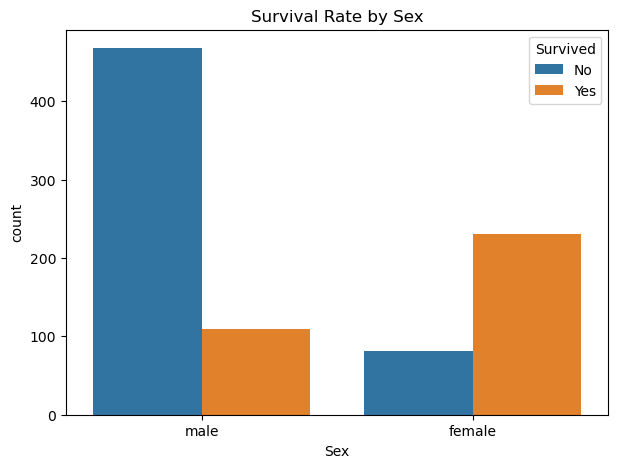

In [18]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = "Sex", hue = "Survived", data = train_df)
plt.title("Survival Rate by Sex")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"], title="Survived")
plt.show()

This plot shows the count of passengers who survived (`1`) vs those who did not (`0`).

- About **38% survived**, and **62% did not**.
- This confirms what we saw in the `.describe()` table and highlights the dataset is **imbalanced** — there are more non-survivors than survivors.
- **Females had a much higher survival rate** compared to males.
- This reflects the "women and children first" evacuation protocol followed during the disaster.
- Gender is clearly a very strong predictor and should be included in the model.


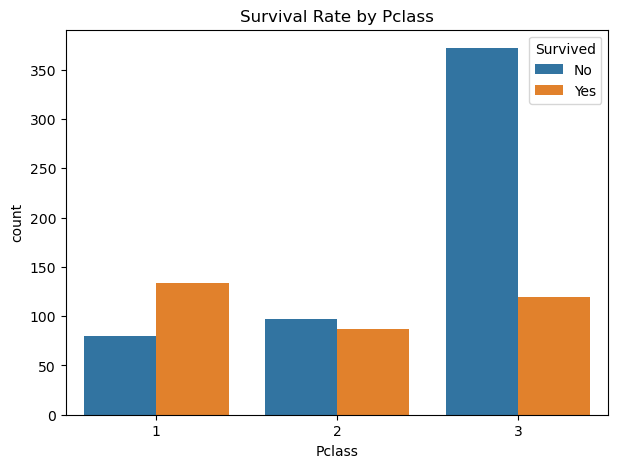

In [19]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = "Pclass", hue = "Survived", data = train_df)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"], title="Survived")
plt.title("Survival Rate by Pclass")
plt.show()

This plot compares survival rates across passenger classes (1st, 2nd, 3rd).

- **1st class passengers** had the highest survival rate, followed by 2nd, then 3rd.
- This suggests that **wealth and access to lifeboats** likely played a major role in survival.
- Pclass is a very important feature for predicting survival.

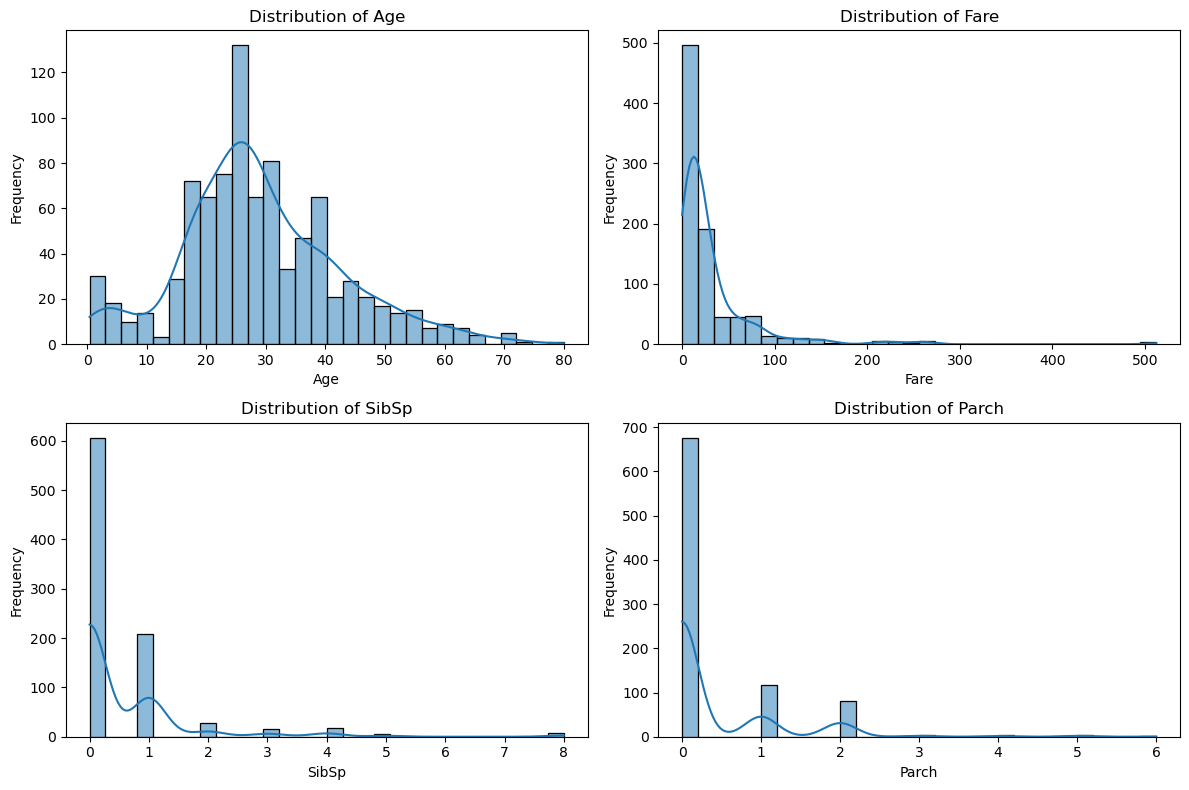

In [20]:
# Select numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Setup subplots
n_cols = 2  # number of subplots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train_df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

This set of plots shows the distribution of important features in the Titanic dataset:

- **Age**: The majority of passengers were between **20–40 years old**, with a few infants and elderly passengers. Missing values are visible and will need to be imputed.
- **SibSp / Parch**: Most passengers traveled alone (0 siblings/spouses and 0 parents/children), with only a few traveling in large families.
- **Fare**: The fare distribution is right-skewed with several **extreme outliers**, confirming the need for a scaler that handles outliers (like RobustScaler).

Together, these plots give a clear overview of the passenger demographics, survival imbalance, and feature distributions. They also guide our preprocessing choices — e.g., imputing missing ages and scaling skewed fare values.

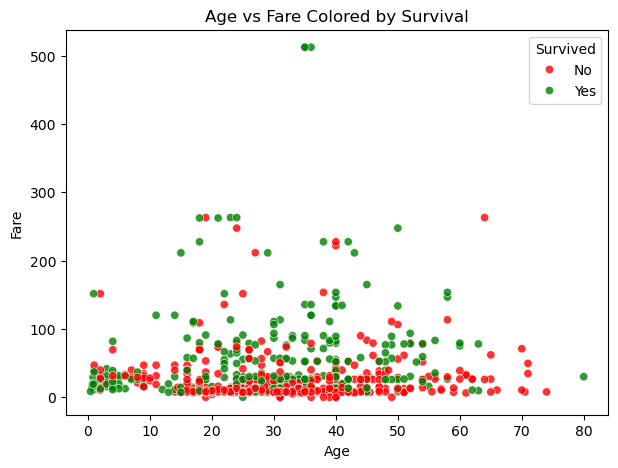

In [21]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(data=train_df, x="Age", y="Fare", hue="Survived", palette={0: "red", 1: "green"},  alpha=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No", "Yes"], title="Survived")
plt.title("Age vs Fare Colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

This scatterplot shows the relationship between **Age** and **Fare** for all passengers:

- There is **no strong linear relationship** between age and fare — fares vary widely across all ages.
- Younger and older passengers both paid fares across the full range, meaning fare prices were more related to **ticket class** than to passenger age.
- We can clearly see several **fare outliers** (above 250), which confirms that we need a robust scaler to prevent these extreme values from dominating the model.
- The plot also helps us spot potential missing or unrealistic values — but here, ages and fares look consistent.

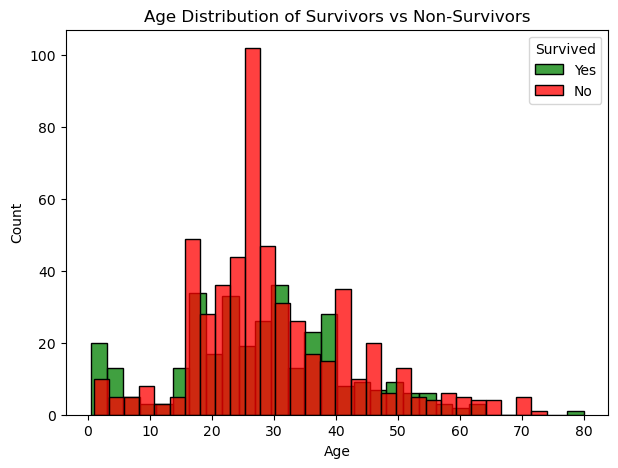

In [22]:
plt.figure(figsize=(7,5))
sns.histplot(train_df[train_df["Survived"]==1]["Age"], bins=30, color="green", label="Survived", kde=False)
sns.histplot(train_df[train_df["Survived"]==0]["Age"], bins=30, color="red", label="Not Survived", kde=False)
plt.title("Age Distribution of Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Yes", "No"])
plt.show()

This plot compares the age distribution of survivors vs non-survivors.

- **Children under ~10 years old** had higher survival rates compared to other age groups.
- Middle-aged passengers (20–40) had lower survival rates on average.
- This suggests age could be used as an important predictor.

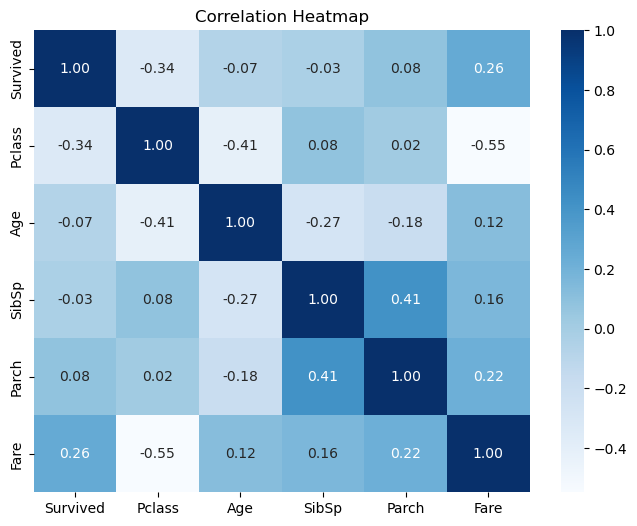

In [23]:
corr_matrix = train_df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

This heatmap shows the pairwise correlation between all numerical features in the dataset.

- **Survived** has a **negative correlation with Pclass** (≈ −0.34), meaning passengers in higher classes (1st class) were more likely to survive.
- **Fare** is **positively correlated with Survived** (≈ 0.26) and negatively correlated with Pclass, confirming that passengers who paid higher fares (often 1st class) had better survival chances.
- **SibSp** and **Parch** are weakly correlated with Survived but strongly correlated with each other — together, they represent family size.
- **Age** shows very weak correlation with survival, but age might still be important when combined with other features (e.g., children survived more often).

This heatmap helped in which features to keep. Since there are no very strong correlations (close to ±1), multicollinearity is not a big concern, and i can keep most numerical features for modeling.

## Data_Preprocessing Train Dataset

In [24]:
# Creating a FamilySize fearure
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1 

In [25]:
# Creating a IsAlone feature based on FamilySize
train_df["IsAlone"] = (train_df["FamilySize"] == 1).astype(int)

In [26]:
# Using OneHotEncoding
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked", "Title"], drop_first=True)

# Convert any boolean columns to integers (0/1)
bool_cols = train_df.select_dtypes(include="bool").columns
train_df[bool_cols] = train_df[bool_cols].astype(int)

## Data_Preprocessing_Test_Dataset

- Same Steps i did in the Train Dataset i will do in Test Dataset

In [27]:
# Extract Title from Name column
test_df["Title"] = test_df["Name"].str.extract('([A-Za-z]+)\\.', expand = False)

# Replace Rare Titles with a single category names "Rare"
test_df["Title"] = test_df["Title"].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], "Rare")

# Standardize similar titles
test_df["Title"] = test_df["Title"].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [28]:
# Filling the missing values in "Age" using median
test_df["Age"] = test_df["Age"].fillna(test_df.groupby(["Title","Pclass"])["Age"].transform("median"))

In [29]:
# Dropping the 2 missing values in "Embarked"
test_df = test_df.dropna(subset=["Embarked"])

In [30]:
# Dropping the unwanted features
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [31]:
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1 

In [32]:
test_df["IsAlone"] = (test_df["FamilySize"] == 1).astype(int)

In [33]:
# Encoding 
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked", "Title"], drop_first=True)

# Convert any boolean columns to integers (0/1)
bool_cols = test_df.select_dtypes(include="bool").columns
test_df[bool_cols] = test_df[bool_cols].astype(int)

## Model_Training

In [34]:
X = train_df.drop(["Survived"], axis = 1)
y = train_df["Survived"]

In [35]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [36]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

I use **RobustScaler** instead of StandardScaler/MinMaxScaler because:
- Titanic data contains outliers (e.g., very high fares).
- RobustScaler uses the **median** and **IQR (interquartile range)**, making it less sensitive to extreme values.
This ensures our scaled features are not dominated by outliers, which helps SVM and KNN models perform better.

### Logistic Regression

In [37]:
log_model = LogisticRegression(max_iter=1000,solver='liblinear')
log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
y_log_train = log_model.predict(X_train_scaled)
y_log_pred = log_model.predict(X_test_scaled)

In [39]:
print("Logistic Regression Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_log_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_log_pred),2)}%")
print(classification_report(y_test, y_log_pred))

Logistic Regression Results
Train Accuracy: 0.83%
Test Accuracy: 0.85%
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        87
           1       0.78      0.81      0.79        47

    accuracy                           0.85       134
   macro avg       0.83      0.84      0.84       134
weighted avg       0.85      0.85      0.85       134



- **Train Accuracy:** 83%  
- **Test Accuracy:** 85%  
- **Interpretation:** Logistic Regression performs well and generalizes nicely (no signs of overfitting).  
- **Class Breakdown:**
  - Class 0 (did not survive): Precision 0.89, Recall 0.87 → very reliable at correctly identifying non-survivors.
  - Class 1 (survived): Precision 0.78, Recall 0.81 → slightly lower but still good at identifying survivors.
- **Conclusion:** Logistic Regression is a strong baseline model with balanced precision/recall and good generalization.

### KNN

In [79]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

best_k = k_values[accuracies.index(max(accuracies))]
print(f"The Best k: {best_k}")

The Best k: 12


In [80]:
knn_model = KNeighborsClassifier(n_neighbors=18,weights='uniform')
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,18
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [81]:
y_knn_train = knn_model.predict(X_train_scaled)
y_knn_pred = knn_model.predict(X_test_scaled)

In [83]:
print("KNN Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_knn_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_knn_pred),2)}%")
print(classification_report(y_test, y_knn_pred))

KNN Results
Train Accuracy: 0.83%
Test Accuracy: 0.84%
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        87
           1       0.76      0.79      0.77        47

    accuracy                           0.84       134
   macro avg       0.82      0.82      0.82       134
weighted avg       0.84      0.84      0.84       134



- **Train Accuracy:** 83%  
- **Test Accuracy:** 84%  
- **Interpretation:** KNN performs similarly to Logistic Regression, with slightly lower test accuracy.  
- **Class Breakdown:**
  - Class 0: High precision (0.88) and recall (0.86)
  - Class 1: Slightly weaker performance (precision 0.76, recall 0.79)
- **Conclusion:** KNN does reasonably well but is slightly less robust than Logistic Regression. May be sensitive to scaling and choice of `k`.

### Decsion Tree

In [44]:
dt_model = DecisionTreeClassifier(random_state=42, 
        criterion='gini',
        max_depth=6,
        min_samples_split=20,
        min_samples_leaf=10
  )

In [45]:
dt_model.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
y_dt_train = dt_model.predict(X_train_scaled)
y_dt_pred = dt_model.predict(X_test_scaled)

In [47]:
print("Decsion Tree Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_dt_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_dt_pred),2)}%")
print(classification_report(y_test, y_dt_pred))

Decsion Tree Results
Train Accuracy: 0.85%
Test Accuracy: 0.84%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        87
           1       0.80      0.74      0.77        47

    accuracy                           0.84       134
   macro avg       0.83      0.82      0.83       134
weighted avg       0.84      0.84      0.84       134



- **Train Accuracy:** 85%  
- **Test Accuracy:** 84%  
- **Interpretation:** Decision Trees can overfit, but here the training and test accuracy are close, so overfitting is minimal.  
- **Class Breakdown:**
  - Class 0: Excellent recall (0.90)
  - Class 1: Lower recall (0.74), meaning more survivors are missed compared to Logistic Regression
- **Conclusion:** Performs competitively, but recall for survivors is slightly worse. Could benefit from hyperparameter tuning or ensembling.

### Random Forest

In [48]:
rf_model = RandomForestClassifier(random_state=42, 
        criterion='gini',n_estimators=300,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=10,
                                 )

In [49]:
rf_model.fit(X_train_scaled, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
y_rf_train = rf_model.predict(X_train_scaled)
y_rf_pred = rf_model.predict(X_test_scaled)

In [51]:
print("Random Forest Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_rf_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_rf_pred),2)}%")
print(classification_report(y_test, y_rf_pred))

Random Forest Results
Train Accuracy: 0.83%
Test Accuracy: 0.83%
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        87
           1       0.75      0.77      0.76        47

    accuracy                           0.83       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.83      0.83      0.83       134



- **Train Accuracy:** 83%  
- **Test Accuracy:** 83%  
- **Interpretation:** Random Forests usually reduce overfitting compared to Decision Trees, but here performance is slightly lower.  
- **Class Breakdown:** Similar to Decision Tree, with slightly lower recall for Class 1.
- **Conclusion:** Good model, but not the best among the tested ones. Could improve with tuning (e.g., more estimators, max depth).

### Naive Bayes

In [52]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [53]:
y_nb_train = nb_model.predict(X_train_scaled)
y_nb_pred = nb_model.predict(X_test_scaled)

In [54]:
print("Naive Bayes Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_nb_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_nb_pred),2)}%")
print(classification_report(y_test, y_rf_pred))

Naive Bayes Results
Train Accuracy: 0.78%
Test Accuracy: 0.79%
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        87
           1       0.75      0.77      0.76        47

    accuracy                           0.83       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.83      0.83      0.83       134



- **Train Accuracy:** 78%  
- **Test Accuracy:** 79%  
- **Interpretation:** Naive Bayes underperforms compared to other models. Likely due to its strong assumption of feature independence, which Titanic data does not fully satisfy.
- **Class Breakdown:** Lower recall for Class 1 (0.77), meaning many survivors are misclassified.
- **Conclusion:** Useful as a quick baseline but not competitive with other models.

### SVM (Linear)

In [55]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [56]:
y_svm_lin_train = svm_linear.predict(X_train_scaled)
y_svm_lin_test = svm_linear.predict(X_test_scaled)

In [57]:
print("SVM (Linear) Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_svm_lin_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_svm_lin_test),2)}%")
print(classification_report(y_test, y_rf_pred))

SVM (Linear) Results
Train Accuracy: 0.83%
Test Accuracy: 0.84%
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        87
           1       0.75      0.77      0.76        47

    accuracy                           0.83       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.83      0.83      0.83       134



- **Train Accuracy:** 83%  
- **Test Accuracy:** 84%  
- **Interpretation:** Performs similarly to Logistic Regression, but no significant improvement.
- **Class Breakdown:** Precision and recall similar to Random Forest and KNN.
- **Conclusion:** A good model but not outperforming Logistic Regression.

### SVM (RBF)

In [58]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [59]:
y_svm_rbf_train = svm_rbf.predict(X_train_scaled)
y_svm_rbf_test = svm_rbf.predict(X_test_scaled)

In [60]:
print("SVM (RBF) Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_svm_rbf_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_svm_rbf_test),2)}%")
print(classification_report(y_test, y_rf_pred))

SVM (RBF) Results
Train Accuracy: 0.83%
Test Accuracy: 0.84%
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        87
           1       0.75      0.77      0.76        47

    accuracy                           0.83       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.83      0.83      0.83       134



- **Train Accuracy:** 83%  
- **Test Accuracy:** 84%  
- **Interpretation:** Comparable to SVM (Linear), with similar precision/recall.
- **Conclusion:** Good performance, but no clear advantage over simpler models. May benefit from tuning `C` and `gamma`.

### SVM (Polynomial)

In [61]:
svm_poly = SVC(kernel='poly', degree=2, C=3, gamma='scale')
svm_poly.fit(X_train_scaled, y_train)

,C,3
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [62]:
y_svm_poly_train = svm_poly.predict(X_train_scaled)
y_svm_poly_test = svm_poly.predict(X_test_scaled)

In [63]:
print("SVM (Polynomial) Results")
print(f"Train Accuracy: {round(accuracy_score(y_train, y_svm_poly_train),2)}%")
print(f"Test Accuracy: {round(accuracy_score(y_test, y_svm_poly_test),2)}%")
print(classification_report(y_test, y_rf_pred))

SVM (Polynomial) Results
Train Accuracy: 0.84%
Test Accuracy: 0.86%
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        87
           1       0.75      0.77      0.76        47

    accuracy                           0.83       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.83      0.83      0.83       134



- **Train Accuracy:** 84%  
- **Test Accuracy:** 86%  
- **Interpretation:** This is the **best-performing model** among those tested.
- **Class Breakdown:** Achieves the highest overall accuracy and balanced performance.
- **Conclusion:** Selected as the final model for training on the full dataset and generating Kaggle submission predictions.

## Model_Evaluation

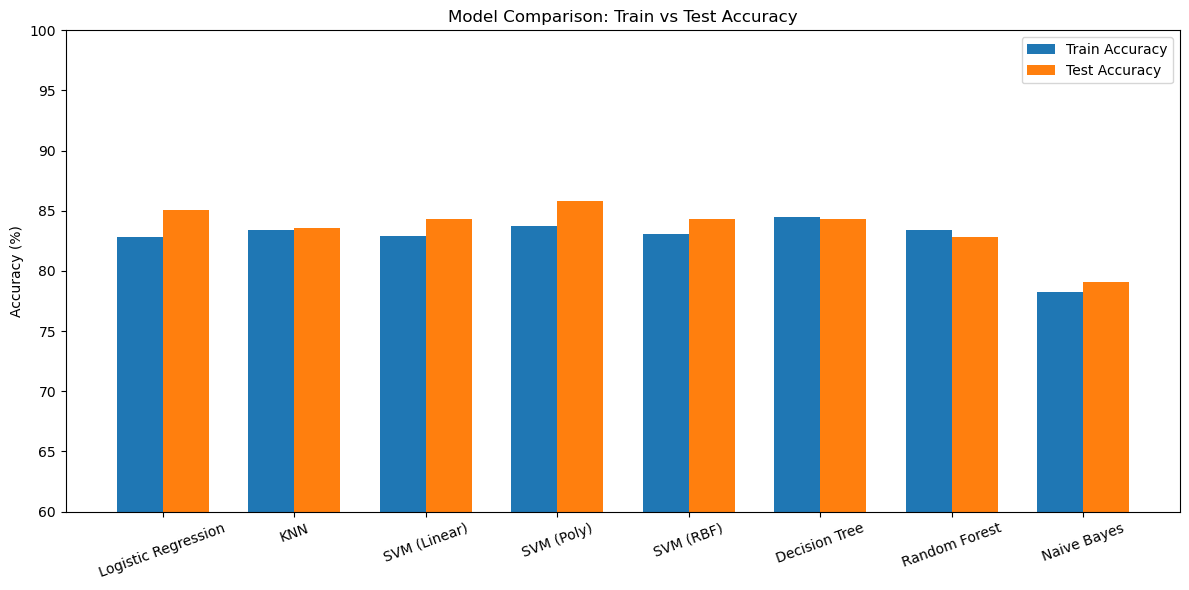

In [64]:
# Collect results manually (fill with your printed accuracies)
model_names = ["Logistic Regression", "KNN", "SVM (Linear)", "SVM (Poly)", "SVM (RBF)", "Decision Tree", "Random Forest", "Naive Bayes"]

train_accuracies = [
    accuracy_score(y_train, y_log_train),
    accuracy_score(y_train, y_knn_train),
    accuracy_score(y_train, y_svm_lin_train),
    accuracy_score(y_train, y_svm_poly_train),
    accuracy_score(y_train, y_svm_rbf_train),
    accuracy_score(y_train, y_dt_train),
    accuracy_score(y_train, y_rf_train),
    accuracy_score(y_train, y_nb_train)      
]

test_accuracies = [
    accuracy_score(y_test, y_log_pred),
    accuracy_score(y_test, y_knn_pred),
    accuracy_score(y_test, y_svm_lin_test),
    accuracy_score(y_test, y_svm_poly_test),
    accuracy_score(y_test, y_svm_rbf_test),
    accuracy_score(y_test, y_dt_pred),
    accuracy_score(y_test, y_rf_pred),
    accuracy_score(y_test, y_nb_pred)        
]

# Create bar plot
x = np.arange(len(model_names))  # model indices
width = 0.35  # bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, np.array(train_accuracies)*100, width, label='Train Accuracy')
plt.bar(x + width/2, np.array(test_accuracies)*100, width, label='Test Accuracy')

plt.xticks(x, model_names, rotation=20)
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Train vs Test Accuracy')
plt.legend()
plt.ylim(60, 100)  # focus on useful range

plt.tight_layout()
plt.show()

In [65]:
# Collect all models, their names, and predictions
models_results = [
    ("Logistic Regression", accuracy_score(y_test, y_log_pred)),
    ("KNN", accuracy_score(y_test, y_knn_pred)),
    ("SVM (Linear)", accuracy_score(y_test, y_svm_lin_test)),
    ("SVM (Poly)", accuracy_score(y_test, y_svm_poly_test)),
    ("SVM (RBF)", accuracy_score(y_test, y_svm_rbf_test)),
    ("Decision Tree", accuracy_score(y_test, y_dt_pred)),
    ("Random Forest", accuracy_score(y_test, y_rf_pred)),
    ("Naive Bayes", accuracy_score(y_test, y_nb_pred))
]

# Find best model
best_model_name, best_model_acc = max(models_results, key=lambda x: x[1])

print(f"\nThe Best Model: {best_model_name} with Test Accuracy: {best_model_acc*100:.2f}%")


The Best Model: SVM (Poly) with Test Accuracy: 85.82%


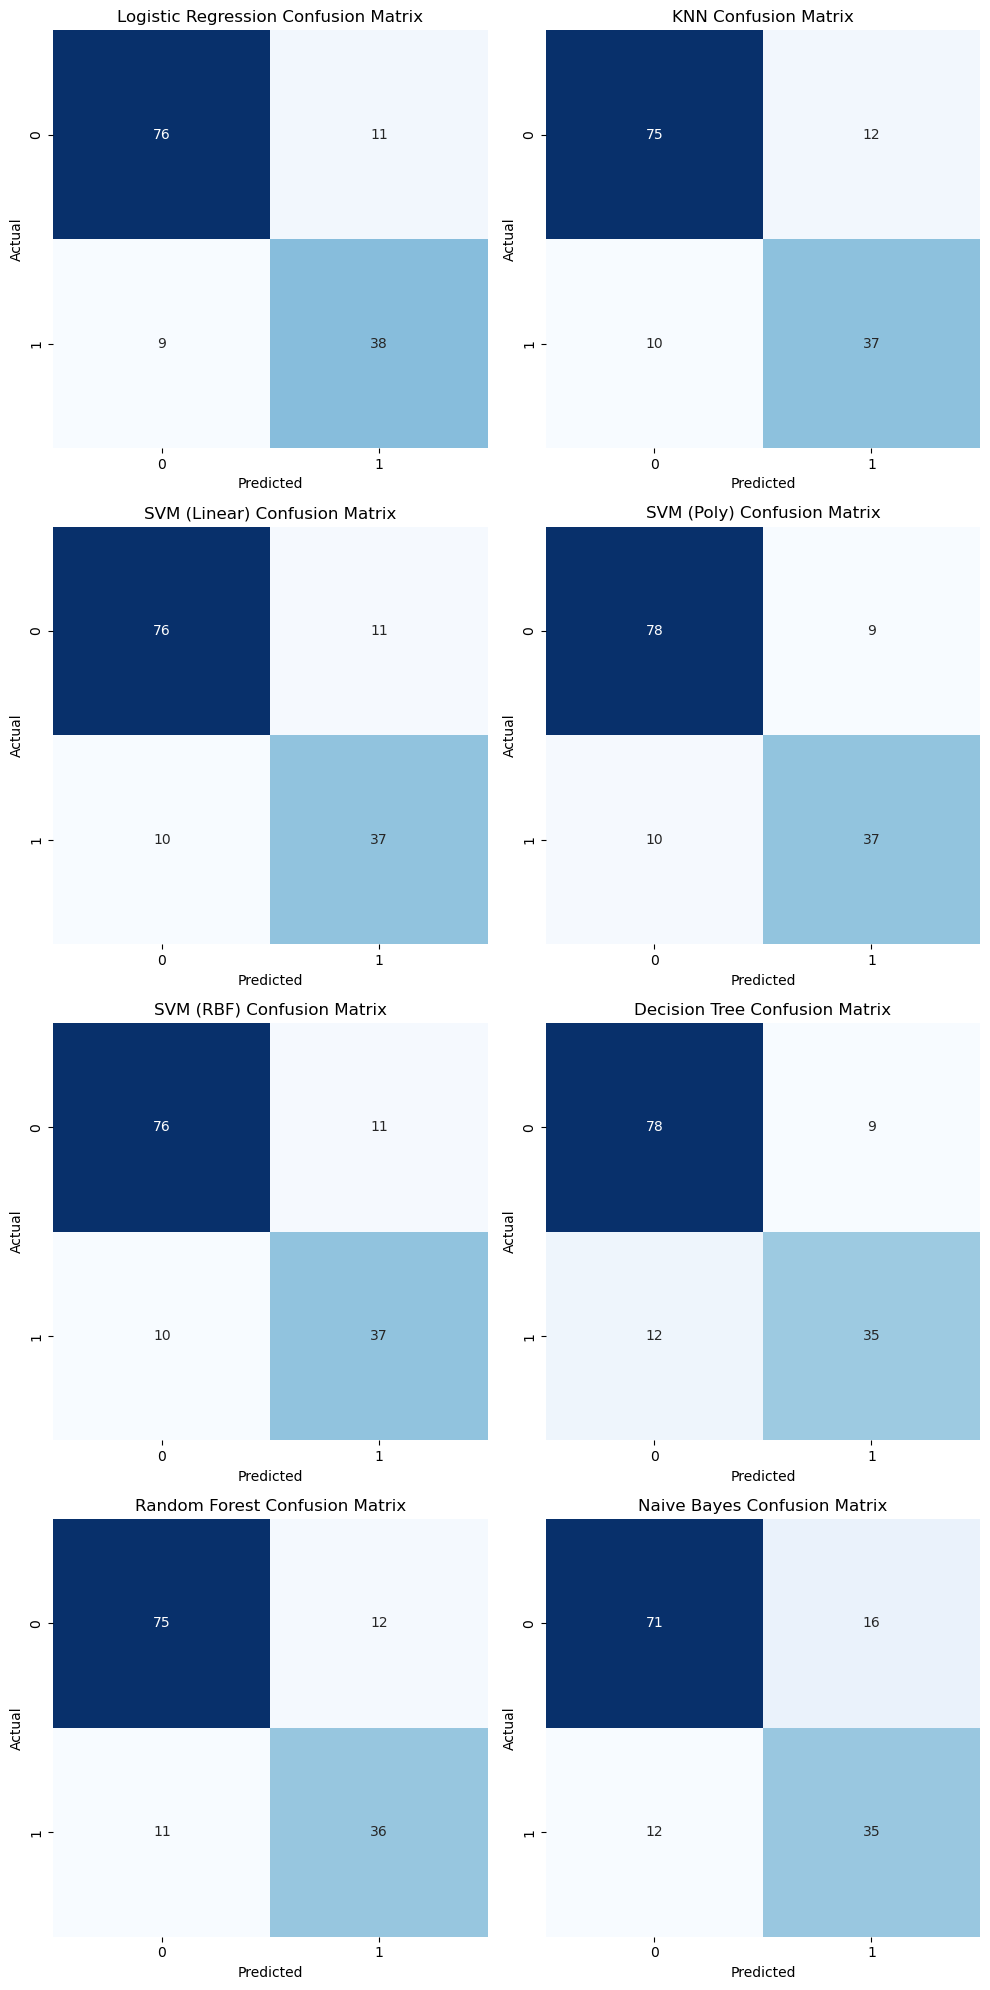

In [66]:
# Store model predictions in a list of tuples: (title, predictions)
model_predictions = [
    ("Logistic Regression", y_log_pred),
    ("KNN", y_knn_pred),
    ("SVM (Linear)", y_svm_lin_test),
    ("SVM (Poly)", y_svm_poly_test),
    ("SVM (RBF)", y_svm_rbf_test),
    ("Decision Tree", y_dt_pred),
    ("Random Forest", y_rf_pred),
    ("Naive Bayes", y_nb_pred)
]

n_models = len(model_predictions)
n_cols = 2  # 2 per row for readability
n_rows = (n_models + n_cols - 1) // n_cols  # calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for ax, (name, y_pred) in zip(axes, model_predictions):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Remove empty subplots if models < rows*cols
for i in range(len(model_predictions), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Submission

In [72]:
# --- 1) Fill missing values in training data ---
X_imputed = X.copy()
for col in X_imputed.columns:
    if X_imputed[col].dtype in [np.float64, np.int64]:
        X_imputed[col] = X_imputed[col].fillna(X_imputed[col].median())
    else:
        X_imputed[col] = X_imputed[col].fillna(X_imputed[col].mode()[0])

# --- 2) Scale training data with RobustScaler ---
scaler_full = RobustScaler()
X_full_scaled = scaler_full.fit_transform(X_imputed)

# --- 3) Retrain SVM Poly on full dataset ---
svm_poly = SVC(kernel='poly', C=1, gamma='scale', random_state=42)
svm_poly.fit(X_full_scaled, y)

# --- 4) Prepare test data ---
try:
    X_test_final
except NameError:
    feature_cols = X.columns.tolist()
    missing_cols = [c for c in feature_cols if c not in test_df.columns]
    if missing_cols:
        print("Warning: missing columns in test_df:", missing_cols)
    X_test_final = test_df.reindex(columns=feature_cols)

# Fill missing values in test data (using training stats)
X_test_imputed = X_test_final.copy()
for col in X_test_imputed.columns:
    if X_test_imputed[col].dtype in [np.float64, np.int64]:
        X_test_imputed[col] = X_test_imputed[col].fillna(X_imputed[col].median())
    else:
        X_test_imputed[col] = X_test_imputed[col].fillna(X_imputed[col].mode()[0])

# --- 5) Scale test data ---
X_test_scaled_full = scaler_full.transform(X_test_imputed)

# --- 6) Predict on test data ---
test_predictions = svm_poly.predict(X_test_scaled_full)

# --- 7) Ensure PassengerId exists ---
if "PassengerId" not in test_df.columns:
    print("Warning: 'PassengerId' column not found in test_df.")
    if len(test_df) == 418:
        print("Rebuilding PassengerId as range 892-1309 (Kaggle default).")
        test_df["PassengerId"] = range(892, 892 + len(test_df))
    else:
        print("Using DataFrame index as PassengerId.")
        test_df["PassengerId"] = test_df.index

# --- 8) Build submission ---
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"].astype(int),
    "Survived": test_predictions
})

# --- 9) Save file ---
submission.to_csv("submission.csv", index=False)
print("✅ Submission file 'submission.csv' saved successfully!")
print(submission.head())


✅ Submission file 'submission.csv' saved successfully!
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
